## Install Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd 
import datetime
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os
import xgboost as xgb
import warnings
import networkx as nx
import pdb
import pickle
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import datetime
import time 
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams 
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os
import xgboost as xgb
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import datetime 
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os
import xgboost as xgb
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import datetime
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os
import xgboost as xgb
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

## Data Information

In [93]:
#reading graph
if not os.path.isfile('train_woheader.csv'):
    traincsv = pd.read_csv('/home/sunil/Link_Prediction/data/train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of duplicate entries: ",sum(traincsv.duplicated()))
    traincsv.to_csv('/home/sunil/Link_Prediction/data/after_eda/train_woheader.csv',header=False,index=False)
    print("saved the graph into file")
else:
    g = nx.read_edgelist('/home/sunil/Link_Prediction/data/after_eda/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(g))

Empty DataFrame
Columns: [source_node, destination_node]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB
None
Number of duplicate entries:  0
saved the graph into file


In [106]:
g = nx.read_edgelist('/home/sunil/Link_Prediction/data/after_eda/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

DiGraph with 1862220 nodes and 9437519 edges


In [99]:
data_train = pd.read_csv("/home/sunil/Link_Prediction/data/train.csv")
data_train.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [97]:
len(data_train)

9437519

DiGraph with 66 nodes and 50 edges


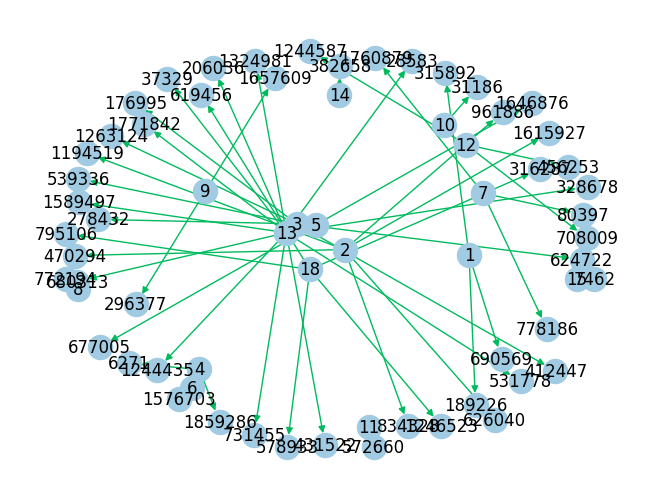

In [3]:
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('/home/sunil/Link_Prediction/data/train.csv', nrows=50).to_csv('train_woheader_sample.csv',header=False,index=False)
    
subgraph=nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

In [162]:
 g = nx.read_edgelist('/home/sunil/Link_Prediction/data/after_eda/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

In [163]:
# No of Unique persons 
print("The number of unique persons",len(g.nodes()))

The number of unique persons 1862220


## 1. Exploratory Data Analysis

### 1.1 No of followers for each person

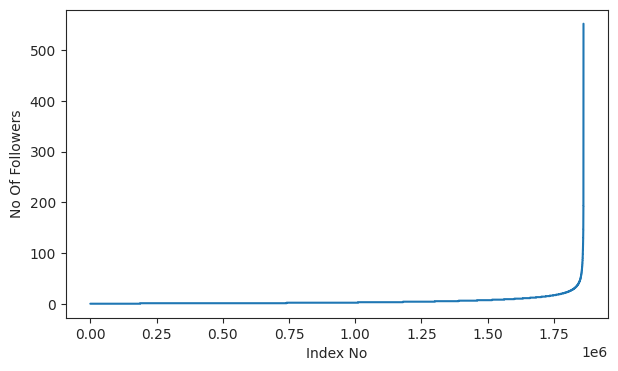

In [165]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(7,4))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

In [174]:
len(indegree_dist)

1862220

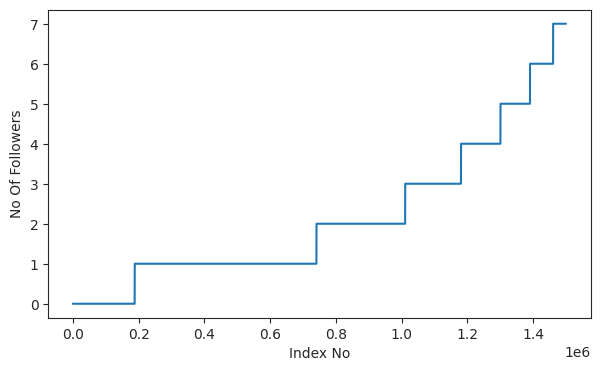

In [166]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(7,4))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

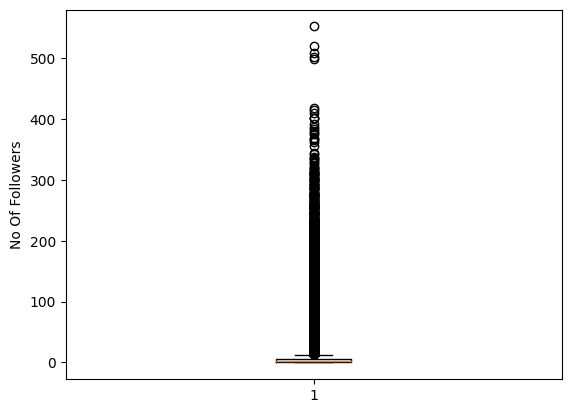

In [8]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

In [9]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [10]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


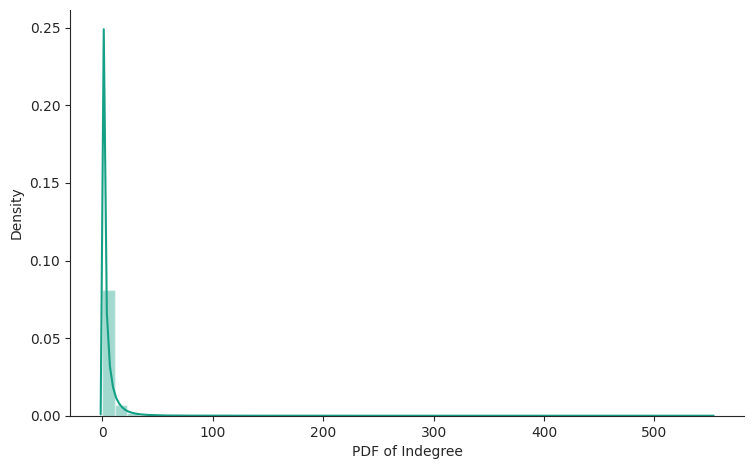

In [168]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
fig.set_size_inches(8.7, 5.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

### 1.2 No of people each person is following

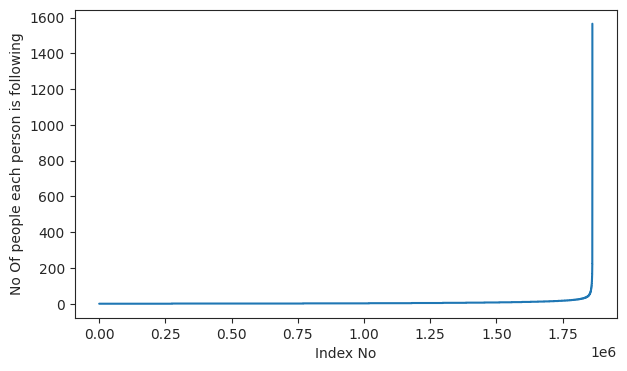

In [171]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(7,4))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

In [175]:
len(outdegree_dist)

1862220

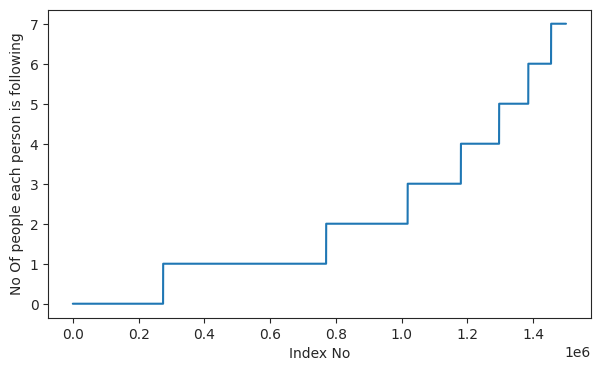

In [172]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(7,4))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

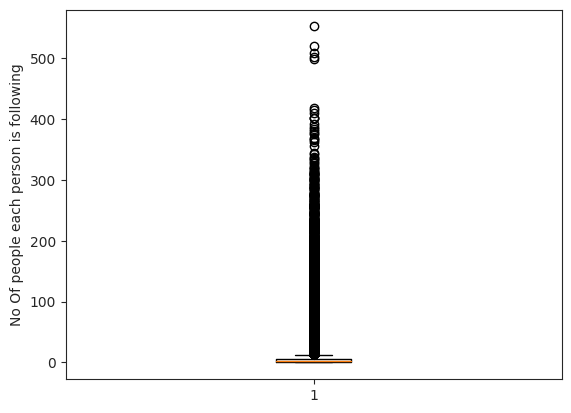

In [13]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [14]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [15]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


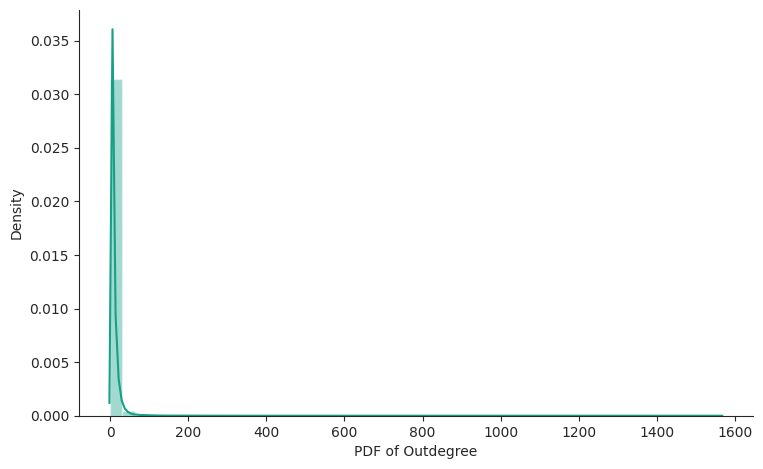

In [173]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8.7, 5.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [17]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )



No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [18]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [120]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not following anyone and also not having any followers are',count)

No of persons those are not following anyone and also not having any followers are 0


### 1.3 Both followers + following

In [20]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

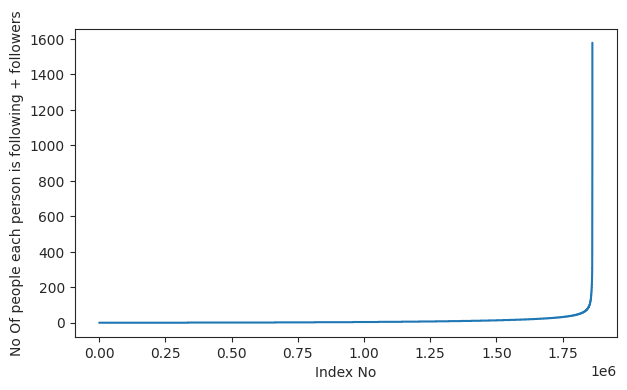

In [169]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(7,4))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

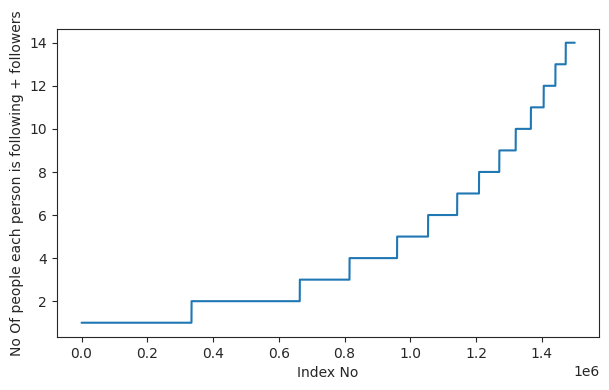

In [170]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(7,4))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [23]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [24]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))


99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [178]:
print('Min of no of followers + following is : ',in_out_degree.min())
print('Persons having minimum no of followers + following : ',np.sum(in_out_degree==in_out_degree.min()))

Min of no of followers + following is :  1
Persons having minimum no of followers + following :  334291


In [180]:
print('Max of no of followers + following is : ',in_out_degree.max())
print('Persons having maximum no of followers + following : ',np.sum(in_out_degree==in_out_degree.max()))

Max of no of followers + following is :  1579
Persons having maximum no of followers + following :  1


In [181]:
print('No of persons having followers + following less than 10 are : ',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are :  1320326


In [182]:
print('No of weakly connected components : ',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes : ',count)

No of weakly connected components :  45558
weakly connected components wit 2 nodes :  32195


## 2. Posing a problem as classification problem

### 2.1 Generating some edges which are not present in graph for supervised learning

In [29]:
missing_edges = pickle.load(open('/home/sunil/Link_Prediction/data/after_eda/missing_edges_final.p','rb'))

In [30]:
len(missing_edges)

9437519

In [31]:
len(missing_edges)

9437519

### 2.2 Training and Test data split:

In [124]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('train_pos_after_eda.csv')) and (not os.path.isfile('test_pos_after_eda.csv')):
    #reading total data df
    df_pos = pd.read_csv('data/train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of Positive edges are ", df_pos.shape[0])
    print("Number of Negative edges are ", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of Positive edges in Train Data are ", y_train_pos.shape[0])
    print("Number of Negative edges in Train Data are ", X_train_neg.shape[0])
    print('='*60)
    print("Number of Positive edges in Test Data are", X_test_pos.shape[0])
    print("Number of Negative edges in Test Data are", X_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('/home/sunil/Link_Prediction/data/after_eda/train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('/home/sunil/Link_Prediction/data/after_eda/test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('/home/sunil/Link_Prediction/data/after_eda/train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('/home/sunil/Link_Prediction/data/after_eda/test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges


Number of Positive edges are  9437519
Number of Negative edges are  9437519
Number of Positive edges in Train Data are  7550015
Number of Negative edges in Train Data are  7550015
Number of Positive edges in Test Data are 1887504
Number of Negative edges in Test Data are 1887504


In [125]:
pwd

'/home/sunil/Link_Prediction'

In [126]:
if (os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/train_pos_after_eda.csv')) and (os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('/home/sunil/Link_Prediction/data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('/home/sunil/Link_Prediction/data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))


DiGraph with 1780722 nodes and 7550015 edges
DiGraph with 1144623 nodes and 1887504 edges
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


In [128]:
#final train and test data sets
if (not os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/train_after_eda.csv')) and \
(not os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/test_after_eda.csv')) and \
(not os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/train_y.csv')) and \
(not os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/test_y.csv')) and \
(os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/train_pos_after_eda.csv')) and \
(os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/test_pos_after_eda.csv')) and \
(os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/train_neg_after_eda.csv')) and \
(os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('/home/sunil/Link_Prediction/data/after_eda/train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('/home/sunil/Link_Prediction/data/after_eda/test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('/home/sunil/Link_Prediction/data/after_eda/train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('/home/sunil/Link_Prediction/data/after_eda/test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('/home/sunil/Link_Prediction/data/after_eda/train_after_eda.csv',header=False,index=False)
    X_test.to_csv('/home/sunil/Link_Prediction/data/after_eda/test_after_eda.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)


In [35]:
X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 

In [36]:
X_train.to_csv('/home/sunil/Link_Prediction/data/after_eda/train_after_eda.csv',header=False,index=False)
X_test.to_csv('/home/sunil/Link_Prediction/data/after_eda/test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)

In [37]:
X_train= pd.read_csv('/home/sunil/Link_Prediction/data/after_eda/train_after_eda.csv')
y_train=pd.read_csv('train_y.csv')
X_test=pd.read_csv('/home/sunil/Link_Prediction/data/after_eda/test_after_eda.csv')
y_test=pd.read_csv('test_y.csv')

In [38]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100029, 2)
Data points in test data (3775007, 2)
Shape of traget variable in train (15100029, 1)
Shape of traget variable in test (3775007, 1)


## 2. Similarity measures

In [39]:
if os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('/home/sunil/Link_Prediction/data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

DiGraph with 1780722 nodes and 7550015 edges


### 2.1 Jaccard Distance

In [40]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim


In [208]:
print(jaccard_for_followees(273084,1505602))
print(jaccard_for_followees(273084,1505602))

0.0
0.0


In [41]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0


In [209]:
print(jaccard_for_followers(273084,470294))
print(jaccard_for_followers(669354,1635354))

0.0
0


### 2.2 Cosine distance

In [42]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [206]:
print(cosine_for_followees(273084,1505602))
print(cosine_for_followees(273084,1635354))

0.0
0


In [43]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0


In [207]:
print(cosine_for_followers(2,470294))
print(cosine_for_followers(669354,1635354))

0.02886751345948129
0


## 3. Ranking Measures

### 3.1 Page Ranking

In [44]:
if not os.path.isfile('page_rank.p'):
    pr = nx.pagerank(train_graph, alpha=0.85)
    pickle.dump(pr,open('page_rank.p','wb'))
else:
    pr = pickle.load(open('page_rank.p','rb'))

In [45]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 1.6556497245737814e-07
max 2.709825134193587e-05
mean 5.615699699389075e-07


In [46]:
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.615699699389075e-07


## 4. Other Graph Features

### 4.1 Shortest path

In [47]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [210]:
compute_shortest_path_length(77697, 826021)

10

In [211]:
compute_shortest_path_length(669354,1635354)

-1

### 4.2 Checking for same community

DiGraph with 6 nodes and 4 edges


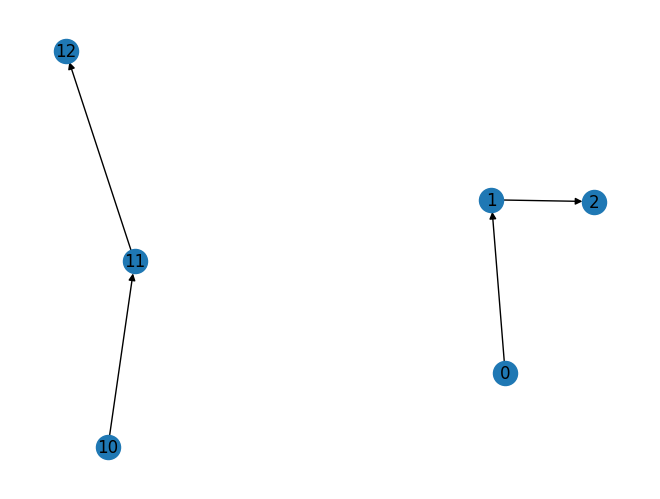

In [214]:
G = nx.path_graph(3, create_using =nx.DiGraph()) # Return the Path graph P_n of n nodes linearly connected by n-1 edges.
nx.add_path(G, [10, 11, 12])
print(nx.info(G))
nx.draw(G, with_labels=True)
plt.show()

In [215]:
print(type (nx.weakly_connected_components(G)))
print(list (nx.weakly_connected_components(G)))

<class 'generator'>
[{0, 1, 2}, {10, 11, 12}]


In [48]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0


In [216]:
belongs_to_same_wcc(861, 1659750) # checking if user 862 belongs to the same community as that of 1659750

0

In [217]:
belongs_to_same_wcc(669354,1635354)

0

### 4.3 Adamic/Adar Index

In [49]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [218]:
calc_adar_in(1,189226)

0

In [219]:
calc_adar_in(669354,1635354)

0

### 4.4 Is person was following back

In [50]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [220]:
follows_back(1,189226)

1

In [221]:
follows_back(669354,1635354)

0

### 4.5 Katz Centrality

In [51]:
if not os.path.isfile('katz.p'):
    katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
    pickle.dump(katz,open('data/fea_sample/katz.p','wb'))
else:
    katz = pickle.load(open('katz.p','rb'))

In [52]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))


min 0.0007313532484065916
max 0.003394554981699122
mean 0.0007483800935562018


In [91]:
mean_katz = float(sum(katz.values())) / len(katz)
print("Average Katz Cetrality is = ",mean_katz)

Average Katz Cetrality is =  0.0007483800935562018


### 4.6 Hits Score

In [54]:
if not os.path.isfile('hits.p'):
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    pickle.dump(hits,open('hits.p','wb'))
else:
    hits = pickle.load(open('hits.p','rb'))

In [55]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min -3.9087421737565776e-21
max 0.004868653379538986
mean 5.61569969930868e-07


## 5. Featurization

### 5. 1 Reading a sample of Data from both train and test

In [56]:
import random
if os.path.isfile('/home/sunil/Link_Prediction/data/after_eda/train_after_eda.csv'):
    filename = "train_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 15100030
    # n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_train =  15100028
    s = 100000 # desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))

In [57]:
n_train =  15100028
s = 100000
skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))

In [58]:
if os.path.isfile('train_after_eda.csv'):
    filename = "test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775008
    # n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_test = 3775006
    s = 50000 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    #https://stackoverflow.com/a/22259008/4084039


In [59]:
n_test = 3775006
s = 50000 #desired sample size
skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))

In [60]:
df_final_train = pd.read_csv('/home/sunil/Link_Prediction/data/after_eda/train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (100002, 3)


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,392731,267971,1


In [167]:
df_final_test = pd.read_csv('/home/sunil/Link_Prediction/data/after_eda/test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (50002, 3)


,source_node,destination_node,indicator_link
0,848424,784690,1
1,210836,1616872,1


### 5.2 Adding a set of features

In [129]:
pwd

'/home/sunil/Link_Prediction'

In [132]:
if not os.path.isfile('/home/sunil/Link_Prediction/storage_sample_stage1.h5'):
    #mapping jaccrd followers to train and test data
    df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    

    #mapping jaccrd followers to train and test data
    df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)


     

In [62]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

In [63]:
import tables

In [64]:
if not os.path.isfile('storage_sample_stage1.h5'):
    df_final_train['num_followers_s'], df_final_train['num_followers_s'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
    
    df_final_test['num_followers_s'], df_final_test['num_followers_s'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
    
    hdf = HDFStore('storage_sample_stage1.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage1.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage1.h5', 'test_df',mode='r')

### 5.3 Adding new set of features

In [65]:
if not os.path.isfile('storage_sample_stage2.h5'):
    #mapping adar index on train
    df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
    #mapping adar index on test
    df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping followback or not on train
    df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #mapping followback or not on test
    df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping same component of wcc or not on train
    df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

    ##mapping same component of wcc or not on train
    df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
    
    #--------------------------------------------------------------------------------------------------------
    #mapping shortest path on train 
    df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
    #mapping shortest path on test
    df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

    hdf = HDFStore('storage_sample_stage2.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage2.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage2.h5', 'test_df',mode='r')


### 5.4 Adding new set of features

In [66]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1780722/1780722 [00:14<00:00, 119602.33it/s]


In [67]:
if not os.path.isfile('storage_sample_stage3.h5'):
    #mapping to pandas train
    df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

    #mapping to pandas test
    df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


    #some features engineerings on the in and out weights
    df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
    df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
    df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
    df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

    #some features engineerings on the in and out weights
    df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
    df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
    df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
    df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [68]:
if not os.path.isfile('storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
    df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

    df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
    #================================================================================

    #Katz centrality score for source and destination in Train and test
    #if anything not there in train graph then adding mean katz score
    df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

    df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    #================================================================================

    #Hits algorithm score for source and destination in Train and test
    #if anything not there in train graph then adding 0
    df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

    df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
    #================================================================================

    #Hits algorithm score for source and destination in Train and Test
    #if anything not there in train graph then adding 0
    df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

    df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
    #================================================================================

    hdf = HDFStore('storage_sample_stage3.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage3.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage3.h5', 'test_df',mode='r')



### 5.5 Adding new set of features

In [69]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [70]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [71]:
Adj = nx.adjacency_matrix(train_graph,nodelist = sorted(train_graph.nodes())).asfptype()

In [72]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [73]:
if not os.path.isfile('storage_sample_stage4.h5'):
    #===================================================================================================
    
    df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    #===================================================================================================
    
    df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================
    
    df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

    #===================================================================================================
    
    df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================

    hdf = HDFStore('storage_sample_stage4.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()


In [74]:
# prepared and stored the data from machine learning models
# pelase check the FB_Models.ipynb
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

## 6. Adding more features

### Preferential Attachment

### Preferential Attachment for followees

In [75]:
#for followees
def pref_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        attach = (len(set(train_graph.successors(a))))*len((set(train_graph.successors(b))))
        return attach
    except:
        return 0


### Preferential Attachment for followers

In [76]:
def pref_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        attach = (len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b))))
        return attach
    except:
        return 0


In [77]:
df_final_train['pref_followers'] = df_final_train.apply(lambda row:
                                            pref_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['pref_followers'] = df_final_test.apply(lambda row:
                                            pref_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
df_final_train['pref_followees'] = df_final_train.apply(lambda row:
                                            pref_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['pref_followees'] = df_final_test.apply(lambda row:
                                            pref_for_followees(row['source_node'],row['destination_node']),axis=1)


In [78]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'svd_u_s_1',
       'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6',
       'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5',
       'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4',
       'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3',
       'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6', 'pref_followers',
       'pref_followees'],
      dtype='object')

## 7. Adding more features

### SVD dot

In [79]:
from tqdm import tqdm
svd_dotut=[]
svd_dotvt=[]
svd_dotute=[]
svd_dotvte=[]
for i in tqdm(range(0,len(df_final_train))):
    a= ((df_final_train['svd_u_s_1'][i]*df_final_train['svd_u_d_1'][i])+(df_final_train['svd_u_s_2'][i]*df_final_train['svd_u_d_2'][i])\
       +(df_final_train['svd_u_s_3'][i]*df_final_train['svd_u_d_3'][i])+(df_final_train['svd_u_s_4'][i]*df_final_train['svd_u_d_4'][i])\
       +(df_final_train['svd_u_s_5'][i]*df_final_train['svd_u_d_5'][i])+(df_final_train['svd_u_s_6'][i]*df_final_train['svd_u_d_6'][i]))
    svd_dotut.append(a)
    
    b= ((df_final_train['svd_v_s_1'][i]*df_final_train['svd_v_d_1'][i])+(df_final_train['svd_v_s_2'][i]*df_final_train['svd_v_d_2'][i])\
       +(df_final_train['svd_v_s_3'][i]*df_final_train['svd_v_d_3'][i])+(df_final_train['svd_v_s_4'][i]*df_final_train['svd_v_d_4'][i])\
       +(df_final_train['svd_v_s_5'][i]*df_final_train['svd_v_d_5'][i])+(df_final_train['svd_v_s_6'][i]*df_final_train['svd_v_d_6'][i]))
    svd_dotvt.append(b)
for j in tqdm(range(0,len(df_final_test))):
    c= ((df_final_test['svd_u_s_1'][j]*df_final_test['svd_u_d_1'][j])+(df_final_test['svd_u_s_2'][j]*df_final_test['svd_u_d_2'][j])\
       +(df_final_test['svd_u_s_3'][j]*df_final_test['svd_u_d_3'][j])+(df_final_test['svd_u_s_4'][j]*df_final_test['svd_u_d_4'][j])\
       +(df_final_test['svd_u_s_5'][j]*df_final_test['svd_u_d_5'][j])+(df_final_test['svd_u_s_6'][j]*df_final_test['svd_u_d_6'][j]))
    svd_dotute.append(c)
    
    d= ((df_final_test['svd_v_s_1'][j]*df_final_test['svd_v_d_1'][j])+(df_final_test['svd_v_s_2'][j]*df_final_test['svd_v_d_2'][j])\
       +(df_final_test['svd_v_s_3'][j]*df_final_test['svd_v_d_3'][j])+(df_final_test['svd_v_s_4'][j]*df_final_test['svd_v_d_4'][j])\
       +(df_final_test['svd_v_s_5'][j]*df_final_test['svd_v_d_5'][j])+(df_final_test['svd_v_s_6'][j]*df_final_test['svd_v_d_6'][j]))
    svd_dotvte.append(d)    
    
df_final_train["svd_dotu"]= svd_dotut
df_final_train["svd_dotv"]= svd_dotvt
df_final_test["svd_dotu"]= svd_dotute
df_final_test["svd_dotv"]= svd_dotvte

df_final_train.columns
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50002/50002 [00:06<00:00, 7152.05it/s]


Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'svd_u_s_1',
       'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6',
       'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5',
       'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4',
       'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3',
       'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6', 'pref_followers',
       'pref_followees', 'svd_dotu', 'svd_dotv'],
      dtype='object')

### EDA on important extracted features

In [157]:
from pandas import read_hdf
df_final_train = read_hdf('/home/sunil/Link_Prediction/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test  = read_hdf('/home/sunil/Link_Prediction/storage_sample_stage4.h5', 'test_df',mode='r')

In [158]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [159]:
y_train = df_final_train.indicator_link
y_test  = df_final_test.indicator_link

In [160]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis = 1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'], axis  = 1,inplace=True)

[CV 1/3] END max_depth=29, min_samples_leaf=51, min_samples_split=125, n_estimators=211;, score=0.962 total time=  42.0s
[CV 1/3] END max_depth=29, min_samples_leaf=34, min_samples_split=142, n_estimators=160;, score=0.963 total time=  41.7s
[CV 2/3] END max_depth=29, min_samples_leaf=34, min_samples_split=142, n_estimators=160;, score=0.963 total time=  42.1s
[CV 2/3] END max_depth=29, min_samples_leaf=51, min_samples_split=125, n_estimators=211;, score=0.963 total time=  43.1s
[CV 3/3] END max_depth=40, min_samples_leaf=34, min_samples_split=126, n_estimators=200;, score=0.962 total time=  42.9s
[CV 1/3] END max_depth=26, min_samples_leaf=47, min_samples_split=141, n_estimators=198;, score=0.963 total time=  42.7s
[CV 3/3] END max_depth=26, min_samples_leaf=47, min_samples_split=141, n_estimators=198;, score=0.962 total time=  42.8s
[CV 3/3] END max_depth=29, min_samples_leaf=51, min_samples_split=125, n_estimators=211;, score=0.962 total time=  43.3s
[CV 2/3] END max_depth=40, min_s

[CV 1/3] END max_depth=30, min_samples_leaf=26, min_samples_split=149, n_estimators=153;, score=0.964 total time=  37.3s
[CV 3/3] END max_depth=28, min_samples_leaf=45, min_samples_split=155, n_estimators=153;, score=0.962 total time=  28.0s
[CV 3/3] END max_depth=29, min_samples_leaf=34, min_samples_split=142, n_estimators=160;, score=0.963 total time=  40.6s
[CV 2/3] END max_depth=29, min_samples_leaf=34, min_samples_split=142, n_estimators=160;, score=0.963 total time=  33.9s
[CV 3/3] END max_depth=28, min_samples_leaf=45, min_samples_split=155, n_estimators=153;, score=0.962 total time=  40.4s
[CV 1/3] END max_depth=29, min_samples_leaf=34, min_samples_split=142, n_estimators=160;, score=0.963 total time=  34.3s
[CV 2/3] END max_depth=28, min_samples_leaf=45, min_samples_split=155, n_estimators=153;, score=0.963 total time=  41.1s
[CV 3/3] END max_depth=29, min_samples_leaf=34, min_samples_split=142, n_estimators=160;, score=0.963 total time=  35.3s
[CV 3/3] END max_depth=37, min_s

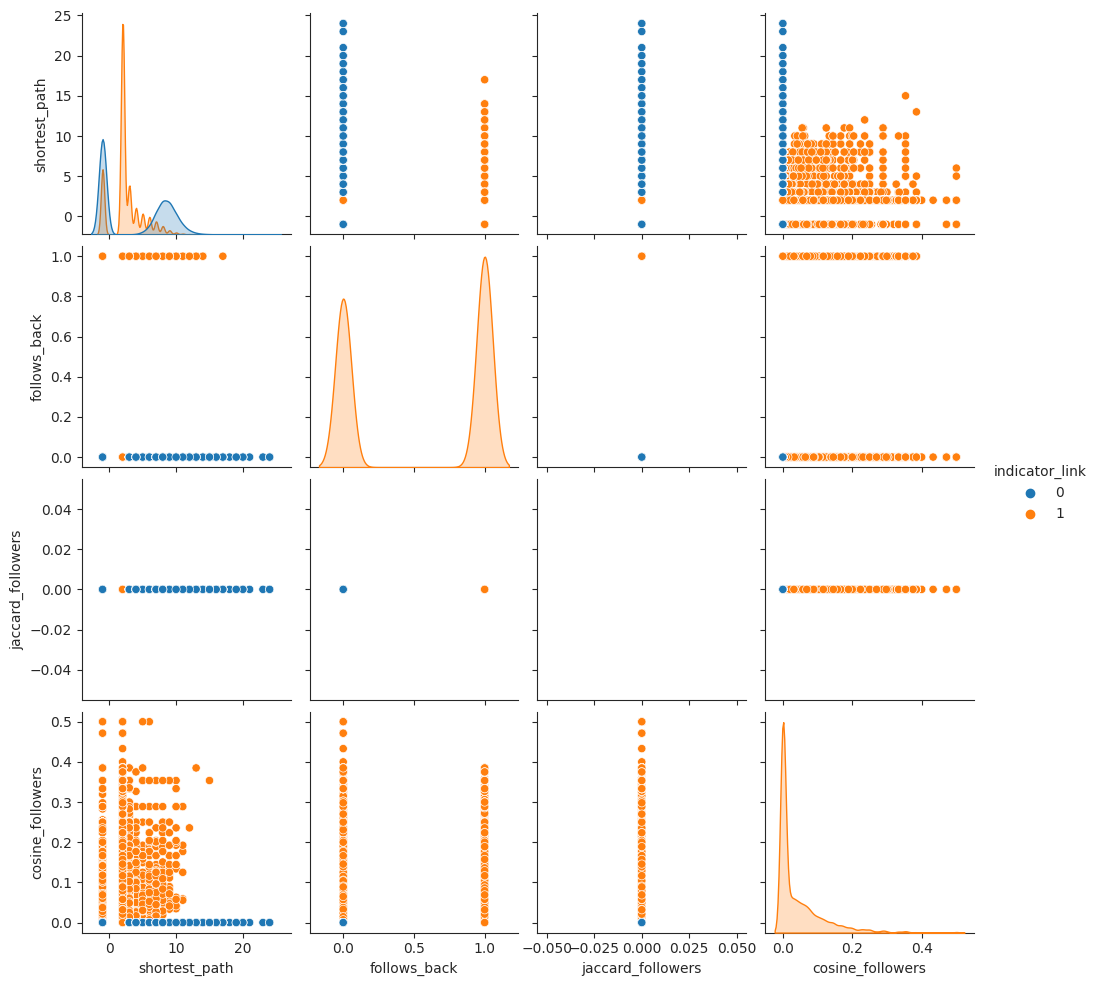

In [161]:
df_final_train["indicator_link"] = y_train
n = df_final_train.shape[0]
sns.pairplot(df_final_train[['shortest_path', 'follows_back', 'jaccard_followers',"cosine_followers",'indicator_link']][0:n], hue='indicator_link', vars=['shortest_path', 'follows_back', 'jaccard_followers',"cosine_followers"])
plt.show()

## Machine Learning Models

### Random ForestClassifier

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
from pandas import read_hdf
df_final_train = read_hdf('/home/sunil/Link_Prediction/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test  = read_hdf('/home/sunil/Link_Prediction/storage_sample_stage4.h5', 'test_df',mode='r')

In [200]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [201]:
y_train = df_final_train.indicator_link
y_test  = df_final_test.indicator_link

In [202]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis = 1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'], axis  = 1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595
Estimators =  500 Train Score 0.9238963240449108 test Score 0.9162681945526931
CPU times: user 6min 12s, sys: 1.21 s, total: 6min 13s
Wall time: 17.6 s


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

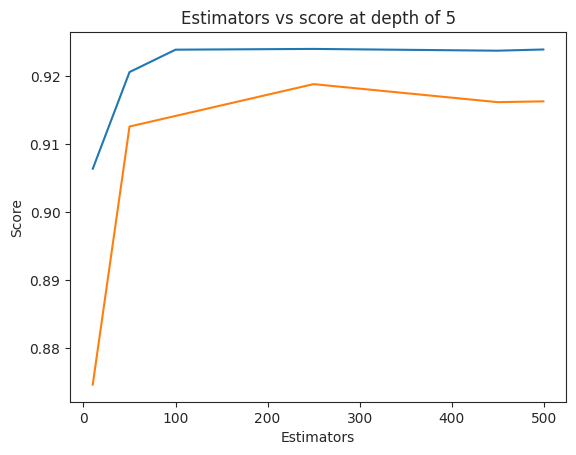

In [203]:
%%time 

estimators = [10,50,100,250,450,500]

train_scores = []
test_scores  = []

for i in estimators:
    clf = RandomForestClassifier( bootstrap=True, class_weight=None, criterion='gini',
                                  max_depth = 5, max_features = 'auto', max_leaf_nodes = None,
                                  min_impurity_decrease = 0.0,
                                  min_samples_leaf = 52, min_samples_split = 120,
                                  min_weight_fraction_leaf = 0.0, n_estimators = i, n_jobs =-1,
                                  random_state = 25,warm_start = False)
    
    clf.fit(df_final_train,y_train) # fitting the classifier
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc  = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)

    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.plot(estimators,train_scores,label = 'Train Score')
plt.plot(estimators,test_scores,label  = 'Test Score')

plt.xlabel('Estimators')
plt.ylabel('Score')

plt.title('Estimators vs score at depth of 5')

In [ ]:
# BLUE CURVE REPRESENT TRAINING
# ORANGE CURVE REPRESENT TESTING

In [145]:
# here we can see as the number of estimators increases test score also increases till Estimators = 250 and then it starts decreasingf again .

depth =  3 Train Score 0.8964289081404971 test Score 0.8774484755578266
depth =  9 Train Score 0.9581477820464481 test Score 0.9245867115931348
depth =  11 Train Score 0.9617793659333854 test Score 0.9251935375294513
depth =  15 Train Score 0.9639261063743403 test Score 0.9265346492981754
depth =  20 Train Score 0.9638992101683215 test Score 0.926801541020189
depth =  35 Train Score 0.964 test Score 0.926885749773689
depth =  50 Train Score 0.964 test Score 0.926885749773689
depth =  70 Train Score 0.964 test Score 0.926885749773689
depth =  130 Train Score 0.964 test Score 0.926885749773689


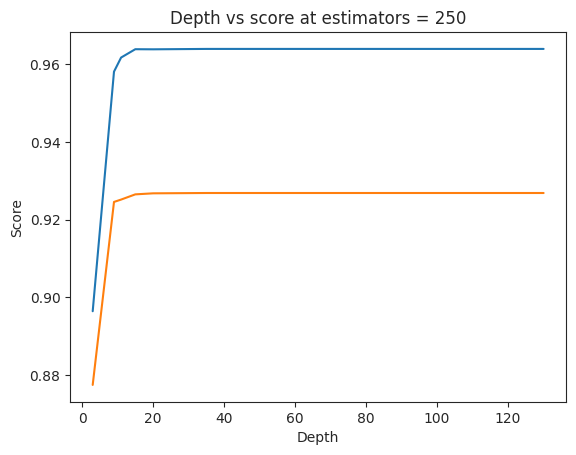

CPU times: user 14min 25s, sys: 2.75 s, total: 14min 28s
Wall time: 36 s


In [204]:
%%time 
depths = [3,9,11,15,20,35,50,70,130]

# since we have already get the optimal number of estimators now let's find optimal depth also .
# just remeber Random forest prefers Trees with high variance and low bias, hence more the depth better it is.

train_scores = []
test_scores = []

for i in depths:
    clf   = RandomForestClassifier( bootstrap = True, max_depth = i, max_features='auto',
                                    min_samples_leaf = 52, min_samples_split = 120,
                                    n_estimators = 250, n_jobs = -1,random_state = 25,verbose = 0)
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc  = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')

plt.xlabel('Depth')
plt.ylabel('Score')

plt.title('Depth vs score at estimators = 250')

plt.show()

### Hyper Paramter Tuning using Randomized Search Cross Validation

In [147]:
%%time 
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators" :sp_randint(150,250),
              "max_depth"    : sp_randint(25,45),
              "min_samples_split" : sp_randint(110,190),
              "min_samples_leaf"  : sp_randint(25,65)}

clf = RandomForestClassifier(random_state = 25,n_jobs = -1)

rf_random = RandomizedSearchCV(clf, param_distributions = param_dist,
                               n_iter = 7,cv = 3,scoring = 'f1',random_state = 25,n_jobs = -1,verbose = 3)

rf_random.fit(df_final_train,y_train)

print("Best Parameter :- ",rf_random.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Parameter :-  {'max_depth': 30, 'min_samples_leaf': 26, 'min_samples_split': 149, 'n_estimators': 153}
CPU times: user 1min 2s, sys: 9.73 s, total: 1min 12s
Wall time: 56.6 s


In [149]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=30, min_samples_leaf=26, min_samples_split=149,
                       n_estimators=153, n_jobs=-1, random_state=25)


In [150]:
clf = RandomForestClassifier( max_depth=30, min_samples_leaf=26, min_samples_split=149,
                              n_estimators=153, n_jobs=-1, random_state=25)

In [151]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred  = clf.predict(df_final_test)

In [152]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score' ,f1_score(y_test,y_test_pred))

Train f1 score 0.9665735907085914
Test f1 score 0.9274315471190996


In [153]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


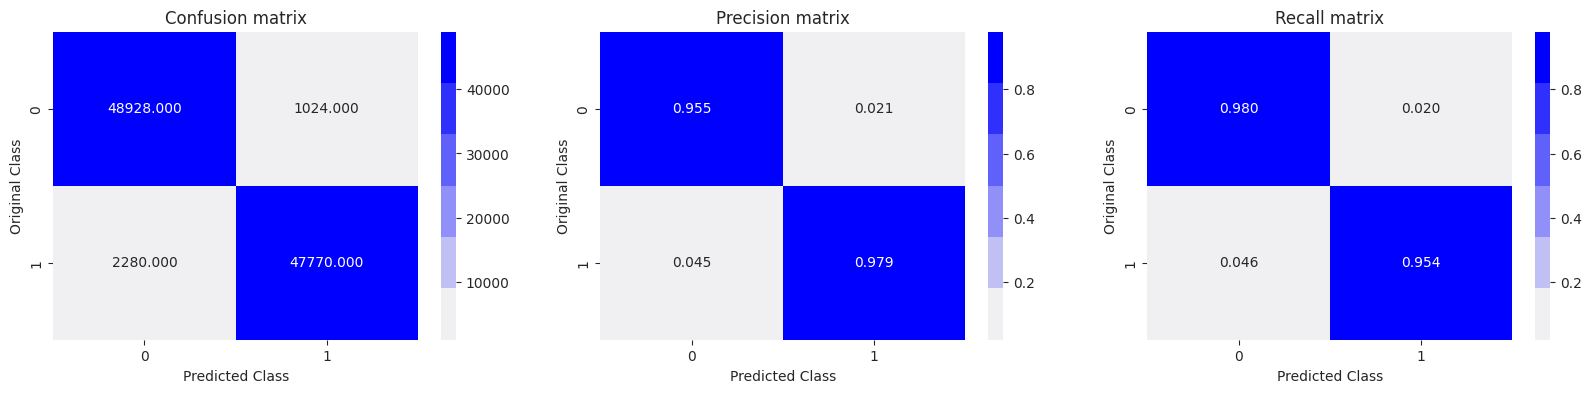

Test confusion_matrix


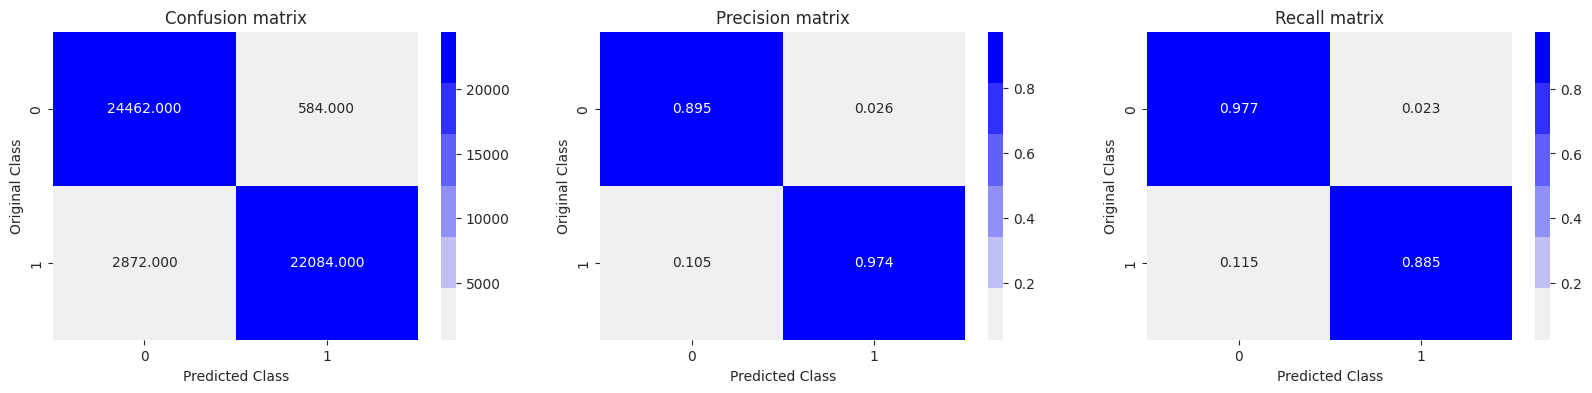

In [154]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)

print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

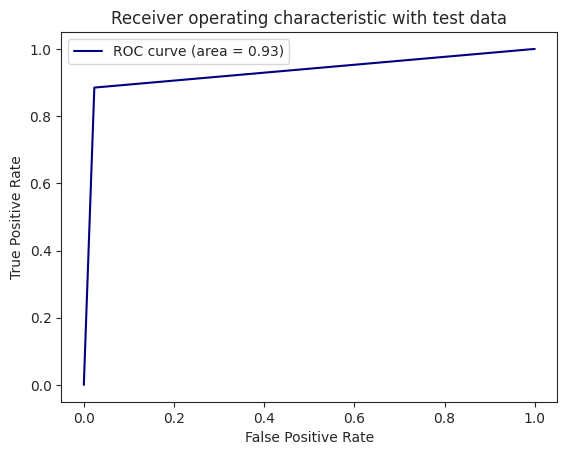

In [155]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc      = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'navy',label = 'ROC curve (area = %0.2f)' % auc_sc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic with test data')
plt.legend()

plt.show()

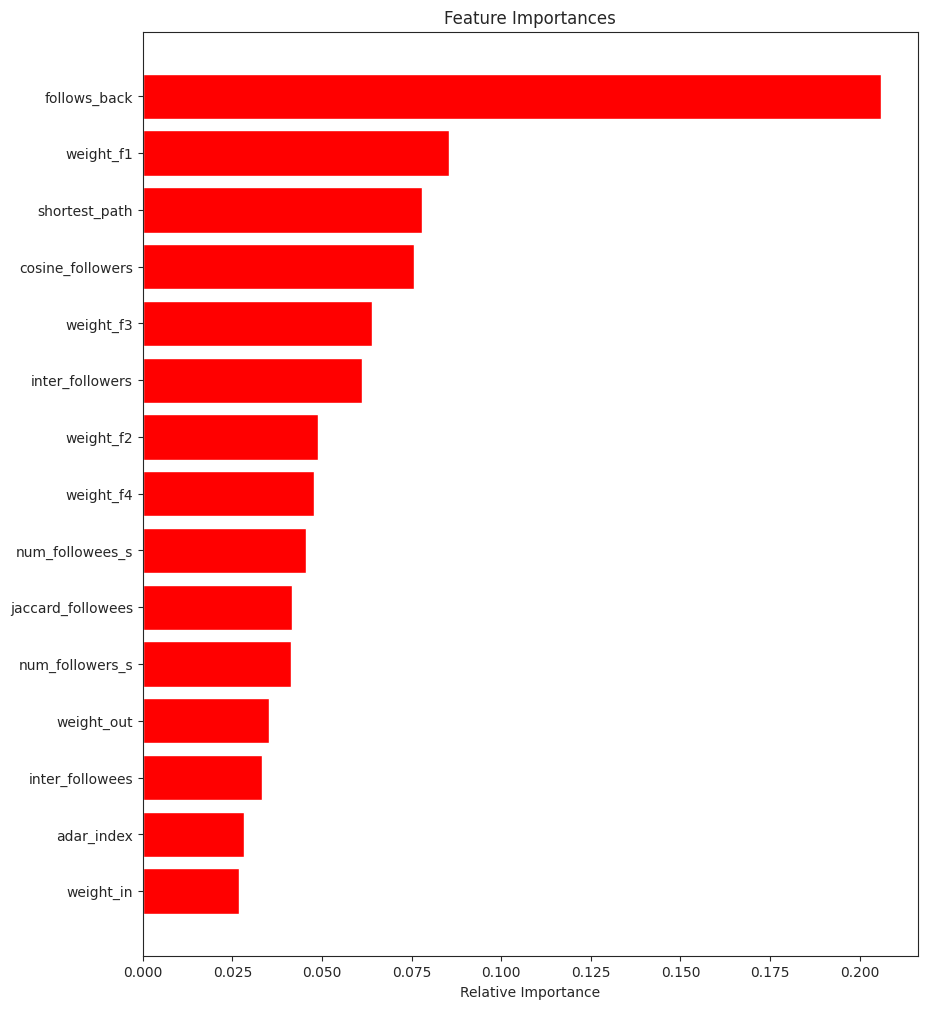

In [156]:
features    = df_final_train.columns
importances = clf.feature_importances_

indices = (np.argsort(importances))[-15:] # extracting 15 most important features

plt.figure(figsize=(10,12))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()